# Reuniones

## Reunion 13/08

- proponer "algo novedoso" o comparación, abordarlo desde otro ángulo.
- Otras metodologías para predicción de prediccion probabilistica (al menos 3)
    - Gans (Generative Adversarial Networks)
        - Revision matematica
    - Re muestreo
    - Predicion conforme (regresion iid)

- Metodología para el manejo de las predicciones
- Variacion en las series de tiempo



### Revisar

- Gans
- prediccion confrome
- Tesis alemania

# Preguntas

Posibilidad de crear un codigo abieto en github en python sobre prediccion probabilistica 

- Implementar los modelos de predicción de densidades
- scoring rules
- Graficos de densidad

# Notas

## Tesis Alemania



<span style="color:blue"> Objective</span>: "improvement of short-term forecasts
of PM10 concentrations at German air quality measuring stations by using a probabilistic
approach and comparing its results to existing point forecasts."

- "Similarly, in the air pollution
literature, machine learning models become more prevalent than numerical weather predictions
((NWPs) model transport and diffusion processes with understanding based
on atmospheric dynamics theory)

- "there is little literature on probabilistic forecasting of particulate matter at this
point."

- <span style="color:red"> *Preguntar* </span>: 3.2. Direct forecasting vs iterative forecasting. It is always preferable use direct approach?
- <span style="color:red"> *Preguntar* </span>: DMS? similar to iterative forecasting?
- *direct multi-step forecasting (DMS)*
- *Maximum likelihood estimator/estimate (MLE)*

<span style="color:blue">Definition of the problem</span>:

Given some information $\mathcal{F}_{s, t}$ at station s and time t, we try to estimate the generating distribution 

$$G(Y_{s, t+h} | \mathcal{F}_{s, t})$$

for h = 1, . . . , 24 at once.

- "Chevillon (2007). They argue that a DMS approach is asymptotically more efficient and is
able to handle non-stationarity in the data"
- "A second decision we made is to fit one global model instead of a single model for each
station. Therefore properties of the stations like the population density and the location of
the station are covariate features on which we train."

1. <span style="color:blue"> Calibration and sharpness to evaluate probabilistic forecasts </span>
- 1. the goal of a forecast is to “maximise the sharpness of a the predictive
distributions subject to calibration”Gneiting, Balabdaoui, and Raftery
(2007)

- 2. "In this case, an
unconditional MLE for the parameters of a lognormal distribution will be a well-calibrated
forecast but with unnecessary uncertainty. The ideal forecast would predict the true deter-
ministic values which would result in smaller (in this case collapsing) confidence intervals."


2. <span style="color:blue"> Proper scoring rules as a unified framework for forecast evaluation</span>
- CRPS

He will use weighted CRPS to evaluate the probabilistic forecasts, because it has two thresholds that are of particular interest are 36 and 50 µg/m3.


 <span style="color:blue"> Probabilistic forecasting</span>

- "EMOS (ensemble model output statistics)
post-processing method to address calibration issues with this approach. Some disadvan-
tages remain: Ensemble forecasting requires each prediction to be run multiple times, which
is computationally expensive. Gneiting et al. (2005) suggest that a number between 5 and
50 is often sensible."

- "generalised additive models for
location, shape and scale (GAMLSS) as described in Stasinopoulos and Rigby (2007). These
are probabilistic in nature: We chose a distribution family like a Normal distribution and then
use generalised additive models to predict its parameters."

- "For this thesis we have decided to implement and compare the XGBoostLSS approach by März
(2019), transformation forests (Hothorn and Zeileis, 2021) and NFBoost (März and Kneib, 2022) as three increasingly flexible tree-based methods for probabilistic forecasting. In this
section we will discuss each of the models in detail."

## Conformal Prediction

The basic goal of conformal prediction is as follows. Let $(X_i , Y_i) \sim P$, $i = 1, \dots, n$ be i.i.d. feature and response pairs, from a distribution $P$ on $X \times Y$. For concreteness, we can think of the feature space as, say, $X = \mathbb{R}^d$, and the response space as $Y = \mathbb{R}$, though this need not be the case in general. Let $\alpha \in (0, 1)$ be a nominal error level. Then we want to find a prediction band,

$$
\hat{C}_n : X \to \{\text{subsets of } Y\},
$$

with the property that for a new i.i.d. pair $(X_{n+1}, Y_{n+1}) \sim P$,

$$
P\left(Y_{n+1} \in \hat{C}_n(X_{n+1})\right) \geq 1 - \alpha,
$$

**First key idea: use ranks to form adjusted quantiles.**

As $Y_{n+1}$ is i.i.d. with $Y_1, \dots, Y_n$, then the rank of $Y_{n+1}$ is uniformly distributed over the values $Y_1, \dots, Y_{n+1}$.

$$
P\left(Y_{n+1} \text{ is among the } \lceil (1 - \alpha)(n + 1) \rceil \text{ smallest of } Y_1, \dots, Y_{n+1} \right) \geq 1 - \alpha,
$$

which is in turn equivalent to

$$
P\left(Y_{n+1} \text{ is among the } \lceil (1 - \alpha)(n + 1) \rceil \text{ smallest of } Y_1, \dots, Y_n \right) \geq 1 - \alpha.
$$

This means that the last step is critical: note that we have moved from a comparison between $Y_{n+1}$ and an order statistic of $Y_1, \dots, Y_{n+1}$ in (4) to a comparison between $Y_{n+1}$ and an order statistic of $Y_1, \dots, Y_n$ in (5). This is key, because what is on the right-hand side of the $\leq$ sign in (5) is computable from just the first $n$ points.

Accordingly, by defining

$$
\hat{q}_n = \lceil (1 - \alpha)(n + 1) \rceil \text{ smallest of } Y_1, \dots, Y_n,
$$

we have precisely achieved

$$
P(Y_{n+1} \leq \hat{q}_n) \geq 1 - \alpha.
$$


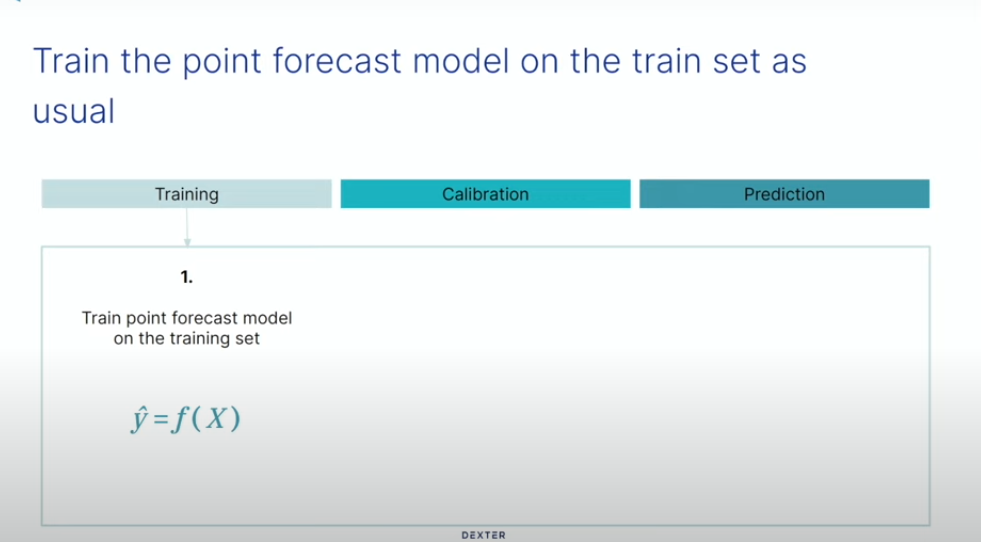
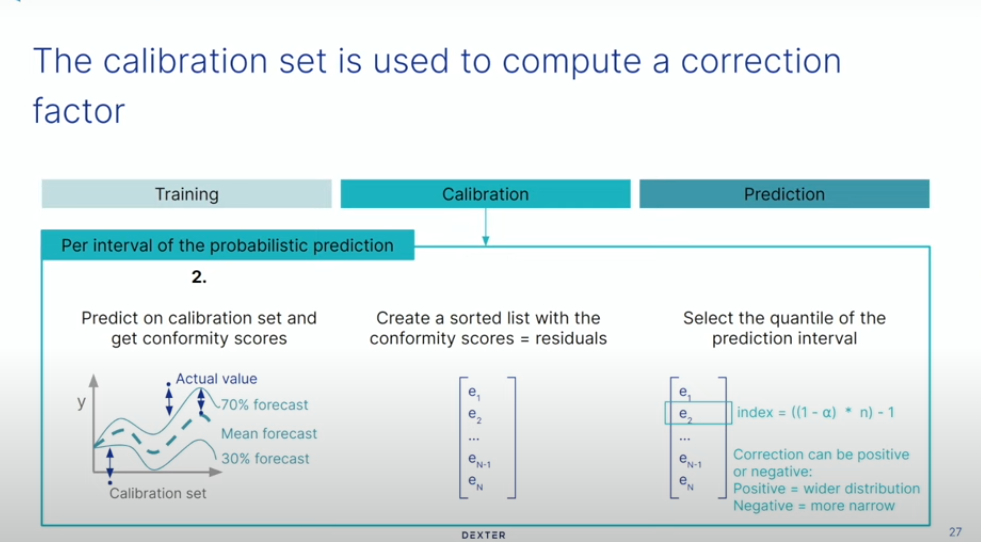
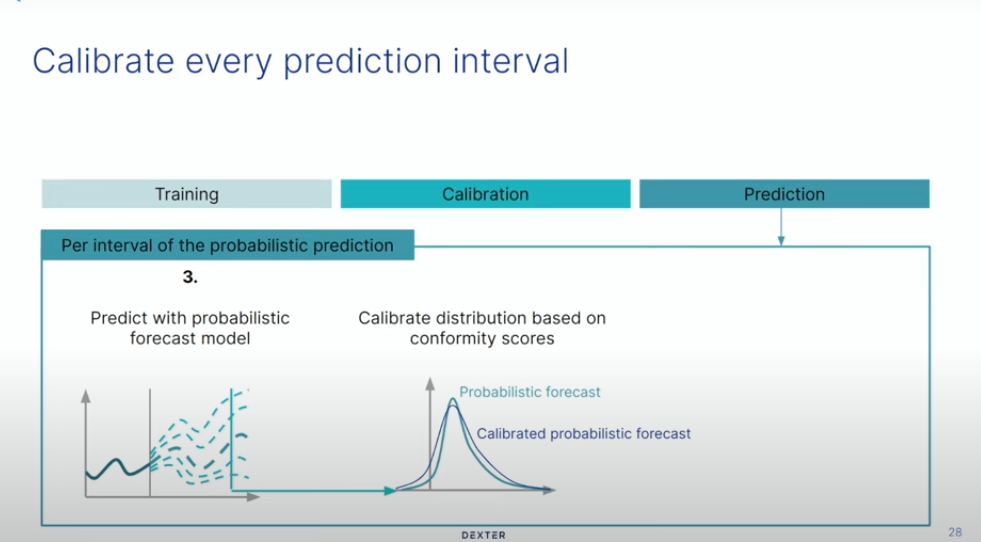
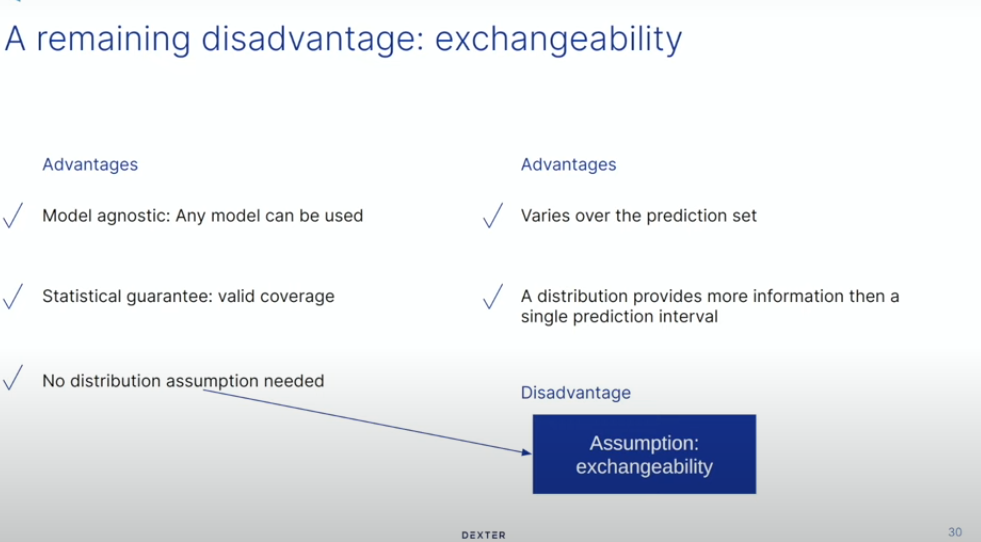

# Notas sobre Predicción Conforme en Series Temporales

## Características principales
- Ofrece garantía estadística, algo poco común en modelos de aprendizaje automático
- No depende del modelo elegido
- No hace suposiciones sobre la distribución de los datos
- Proporciona una distribución completa de predicciones

## Proceso
1. Se repite para cada intervalo de predicción ya hecho con el modelo
2. Se compara con un intervalo en lugar de una línea única
3. Se listan todas las diferencias entre el valor real y la línea más cercana del intervalo como puntuaciones de conformidad

## Corrección y calibración
- Se añade un factor de corrección para ajustar la distribución (más ancha o estrecha)
- Se calibra la previsión en lugar de solo hacer predicciones
- Se aplica el factor de corrección en el conjunto de calibración

## Ventajas
- Mantiene las características positivas de los métodos tradicionales
- Varía a lo largo del conjunto de prueba o predicción
- Proporciona una distribución completa de probabilidades

## Limitación: Suposición de intercambiabilidad
- Asume que los datos son intercambiables en el tiempo
- Puede ser problemático en series temporales con deriva de datos
- Existen soluciones que se enfocan más en la parte reciente de la serie temporal, pero se pierde la garantía estadística

## Aplicaciones
- Puede acelerar la transición a energías renovables
- Potencial para acelerar otros temas y áreas de investigación

## Tendencias
- Interés creciente desde principios de 2022
- Tema en desarrollo con actualizaciones frecuentes

## Recursos adicionales
- Repositorio con información extensa y actualizaciones sobre el tema
- Próximo taller en enero para aplicación práctica en Python

## Preguntas y respuestas
- Se abordó el problema de los "conos cruzados" en la regresión cuántica
- Se discutió la aplicabilidad a modelos de series temporales con múltiples entradas y salidas
- Se aclaró la diferencia entre intercambiabilidad y estacionariedad en series temporales